In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

**1. Importing and exploring the dataset**

In [59]:
data= pd.read_csv('/content/sample_data/heart_failure_clinical_records_dataset.csv')

In [60]:
type(data)

pandas.core.frame.DataFrame

In [61]:
data.shape

(299, 13)

In [62]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [63]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [64]:
categorical_variables = data[["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]]
continuos_variables= data[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", \
                         "serum_sodium", "time"]]

In [65]:
type(categorical_variables)

pandas.core.frame.DataFrame

In [66]:
data.isna().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [67]:
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [68]:
continuos_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [69]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [70]:
age= data[["age"]]
platelets= data[["platelets"]]

In [71]:
type(data[['age']])

pandas.core.frame.DataFrame

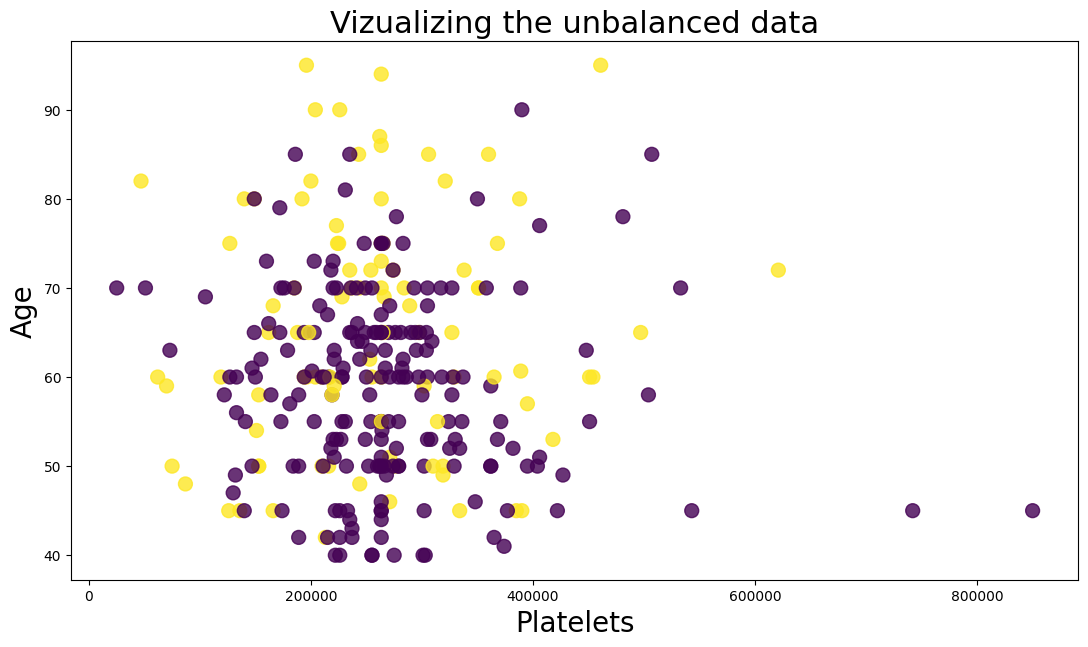

In [72]:
plt.figure(figsize=(13,7))
plt.scatter(platelets,age, c = data["DEATH_EVENT"], s=100, alpha= 0.8)
plt.xlabel("Platelets", fontsize = 20)
plt.ylabel("Age", fontsize= 20)
plt.title("Vizualizing the unbalanced data", fontsize = 22)
plt.show()

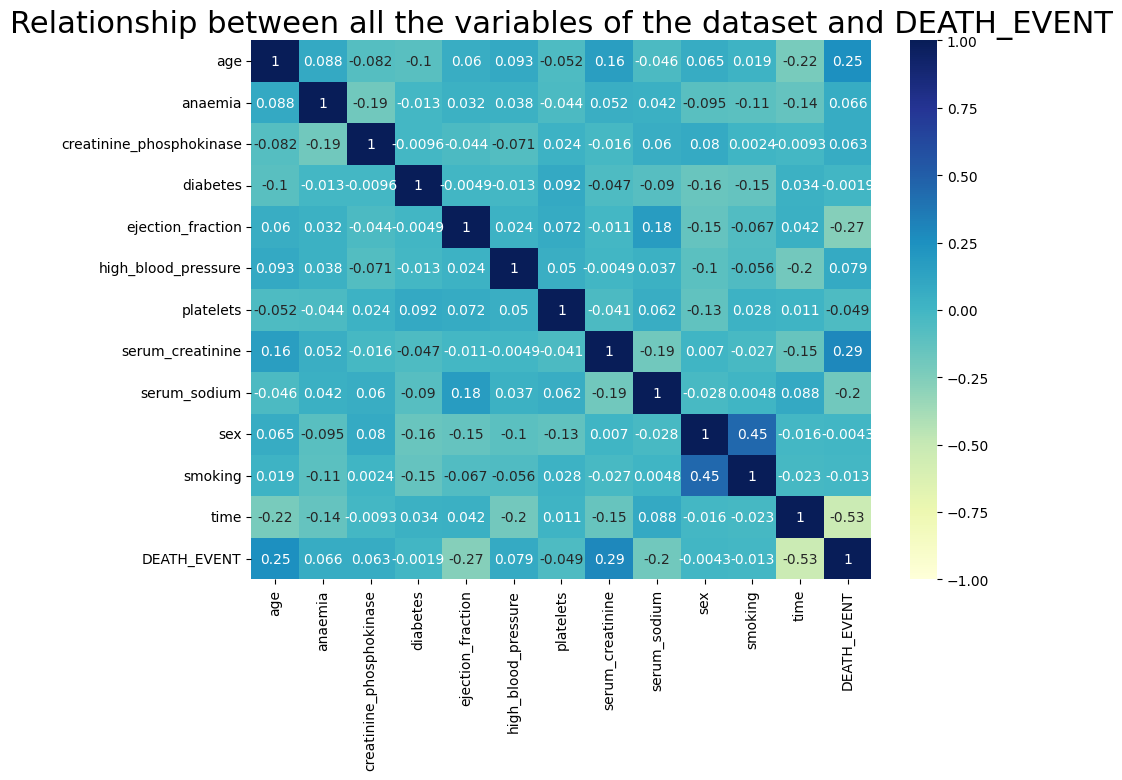

In [73]:
plt.figure(figsize= (10,7))
sns.heatmap(data.corr(), vmin = -1, vmax = 1, cmap= "YlGnBu", annot=True)
plt.title("Relationship between all the variables of the dataset and DEATH_EVENT", fontsize = 22)
plt.show()


**2.Data Vizualization**

In [74]:
categorical_data = ["anaemmia", "diabetes", "high_blood_purpose", "sex", "smoking"]
continuos_data= ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]

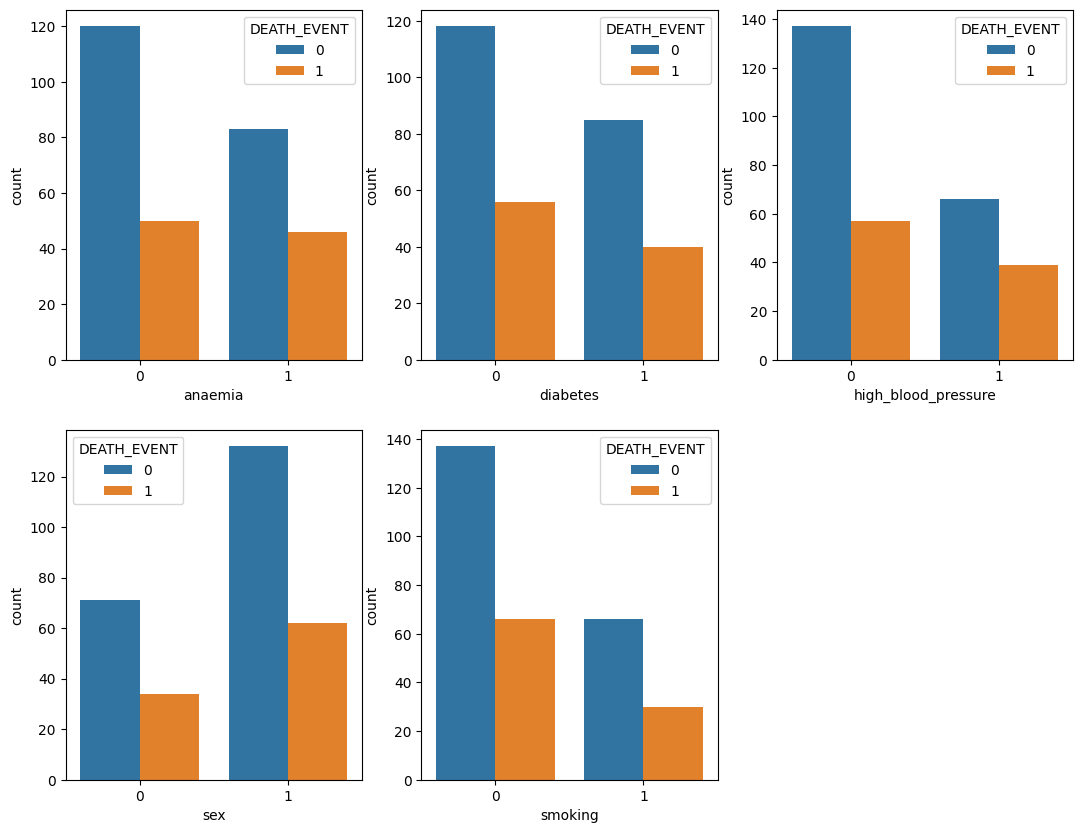

In [75]:
plt.figure(figsize= (13,10))
categorical_data = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"] # Corrected typos
for i, cat in enumerate(categorical_data):
  plt.subplot(2,3,i+1)
  sns.countplot(data= data, x= cat, hue= "DEATH_EVENT")
plt.show()

<Axes: xlabel='diabetes', ylabel='count'>

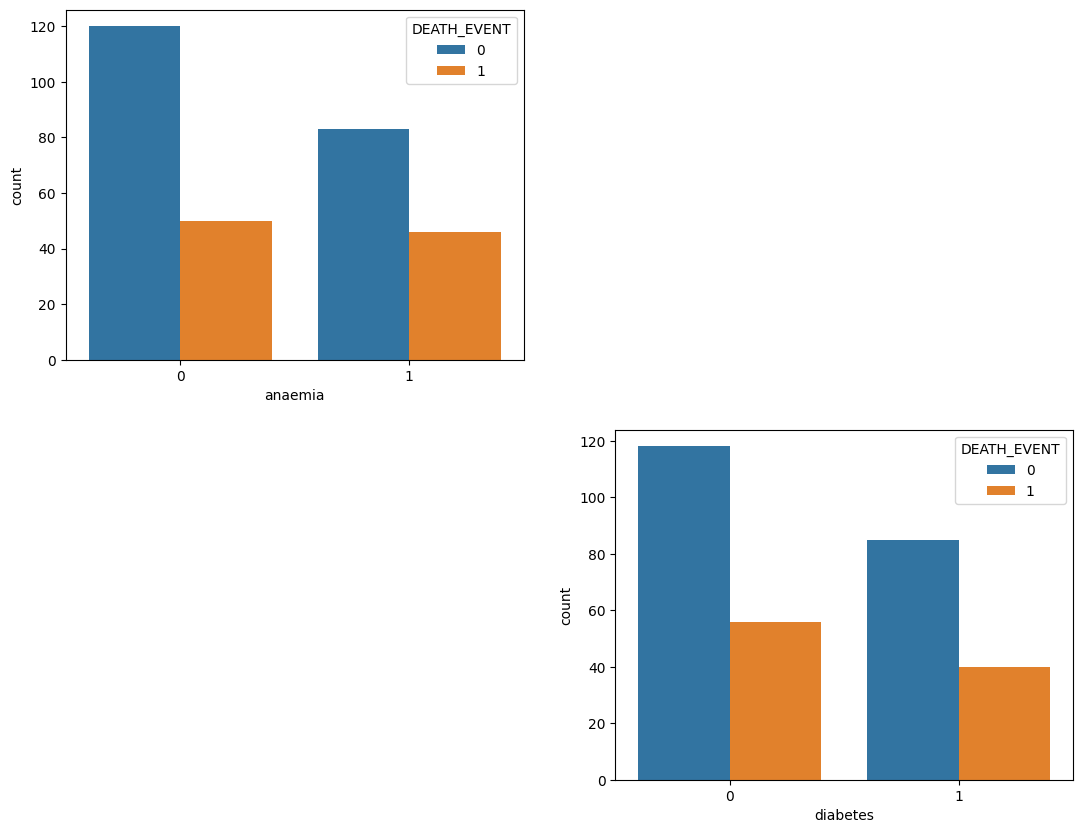

In [76]:
plt.figure(figsize= (13,10))
plt.subplot(2,2,1)
sns.countplot(data= data, x= "anaemia", hue= "DEATH_EVENT")
plt.subplot(2,2,4)
sns.countplot(data= data, x= "diabetes", hue= "DEATH_EVENT")


In [77]:
for i, cat in enumerate(categorical_data):
  print(i, cat)

0 anaemia
1 diabetes
2 high_blood_pressure
3 sex
4 smoking


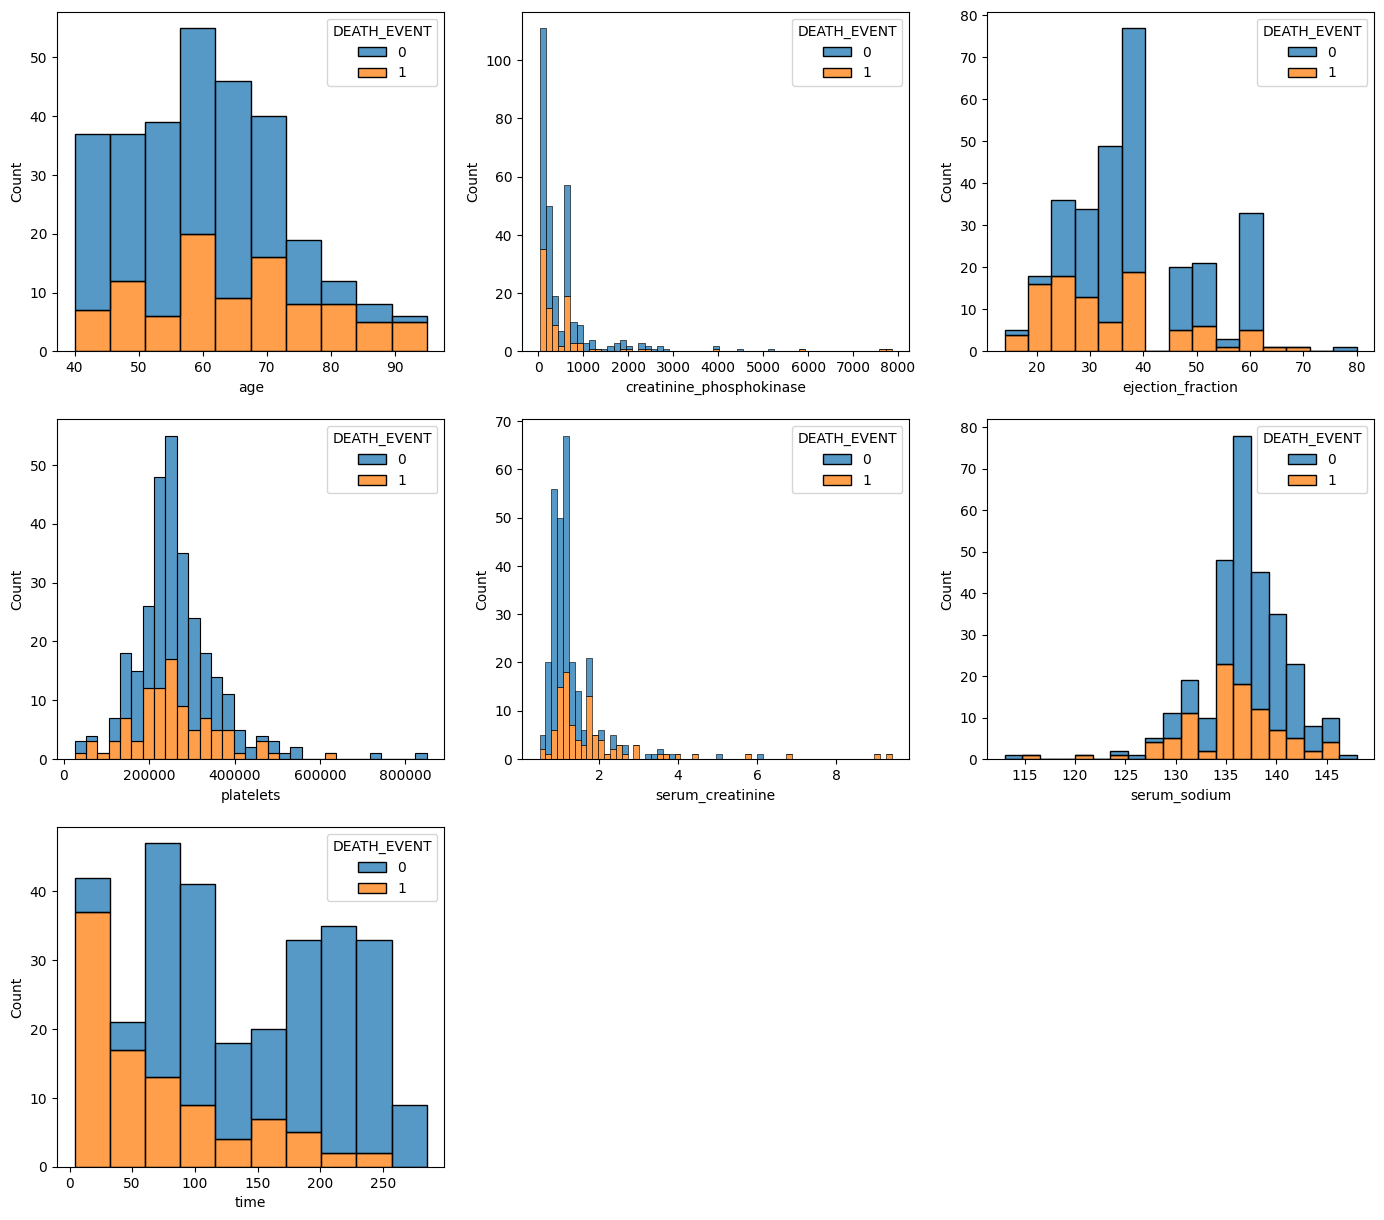

In [78]:
plt.figure(figsize= (17,15))
for j, con in enumerate(continuos_data):
  plt.subplot(3,3,j+1)
  sns.histplot(data= data, x= con, hue= "DEATH_EVENT", multiple= "stack")
plt.show()

In [79]:
for i, cat in enumerate(continuos_data):
  print(i,cat)

0 age
1 creatinine_phosphokinase
2 ejection_fraction
3 platelets
4 serum_creatinine
5 serum_sodium
6 time


<Axes: xlabel='age', ylabel='Count'>

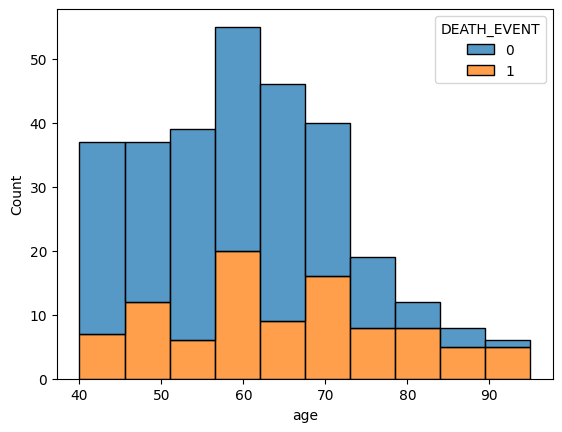

In [80]:
sns.histplot(data= data, x = 'age', hue= "DEATH_EVENT", multiple= "stack")

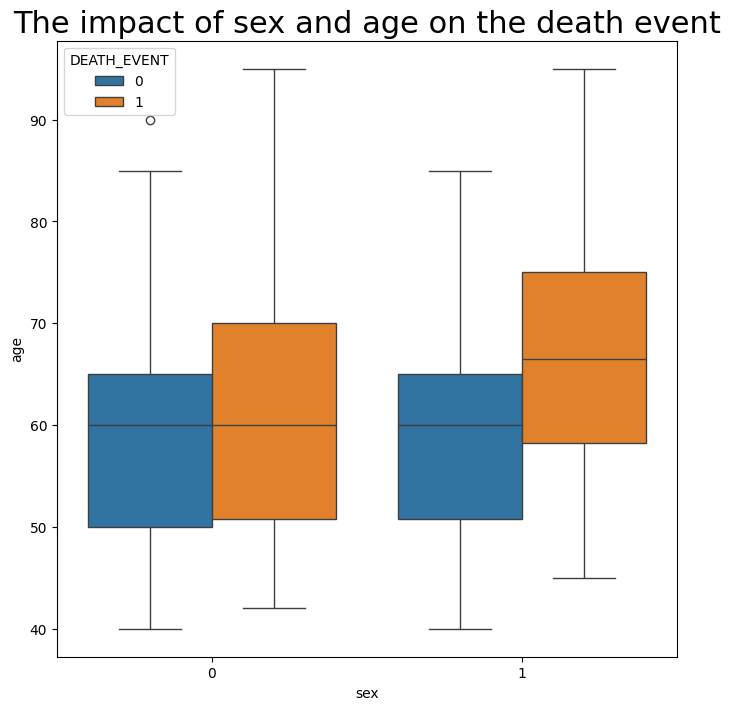

In [81]:
plt.figure(figsize = (8,8))
sns.boxplot(data= data, x= "sex", y= "age", hue= "DEATH_EVENT")
plt.title("The impact of sex and age on the death event", fontsize= 22)
plt.show()

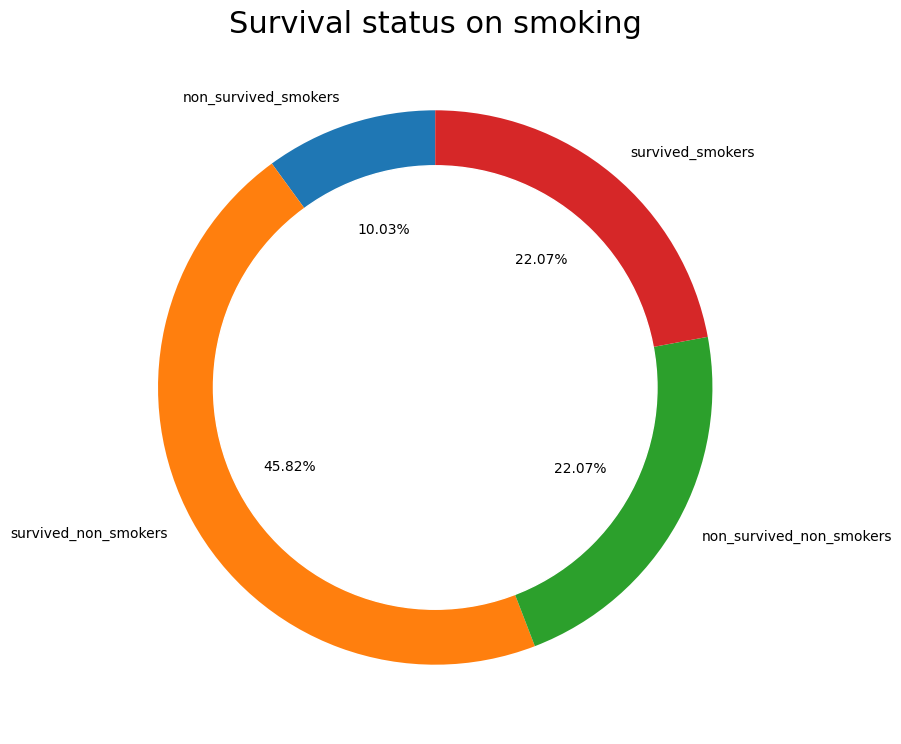

In [82]:
smokers= data[data["smoking"]==1]
non_smokers= data[data["smoking"]==0]


non_survived_smokers= smokers[smokers["DEATH_EVENT"]==1]
survived_non_smokers= non_smokers[non_smokers["DEATH_EVENT"]==0]
non_survived_non_smokers = non_smokers[non_smokers["DEATH_EVENT"]==1]
survived_smokers= smokers[smokers["DEATH_EVENT"]==0]

smoking_data= [len(non_survived_smokers), len(survived_non_smokers), len(non_survived_non_smokers), len(survived_smokers)]
smoking_labels= ["non_survived_smokers", "survived_non_smokers", "non_survived_non_smokers", "survived_smokers"]

plt.figure(figsize= (9,9))
plt.pie(smoking_data, labels= smoking_labels, autopct= '%.2f%%' , startangle=90)
circle= plt.Circle((0,0), 0.8, color= "white")
p= plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on smoking", fontsize= 22)
plt.show()

In [83]:
type(non_smokers)

pandas.core.frame.DataFrame

In [84]:
smokers[smokers["DEATH_EVENT"]==1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.00,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.90,140,1,1,10,1
22,68.0,1,220,0,35,1,289000.00,0.90,140,1,1,20,1
25,80.0,0,148,1,38,0,149000.00,1.90,144,1,1,23,1
27,70.0,0,122,1,45,1,284000.00,1.30,136,1,1,26,1
29,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1


In [85]:
(len(non_survived_smokers)/299)*100

10.033444816053512

In [86]:
smoking_data

[30, 137, 66, 66]

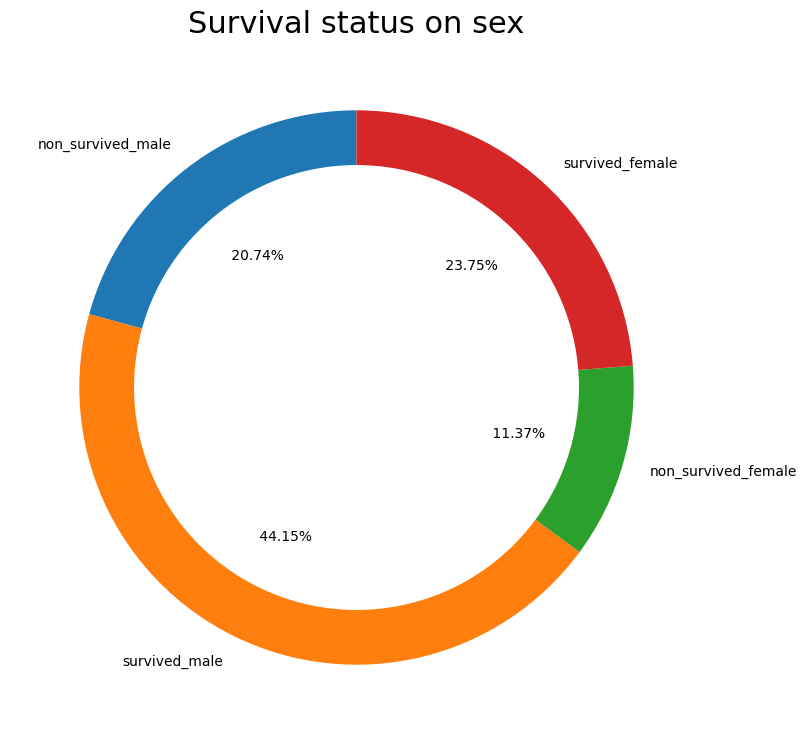

In [87]:
male= data[data["sex"]== 1]
female= data[data["sex"]== 0]

non_survived_male= male[male["DEATH_EVENT"]== 1]
survived_male= male[male["DEATH_EVENT"]== 0]
non_survived_female= female[female["DEATH_EVENT"]== 1]
survived_female= female[female["DEATH_EVENT"]== 0]

sex_data= [len(non_survived_male), len(survived_male), len(non_survived_female), len(survived_female)]
sex_labels= ["non_survived_male", "survived_male", "non_survived_female", "survived_female"]

plt.figure(figsize= (9,9))
plt.pie(sex_data, labels= sex_labels, autopct= '% .2f%%' , startangle=90)
circle= plt.Circle((0,0), 0.8, color= "white")
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on sex", fontsize= 22)
plt.show()



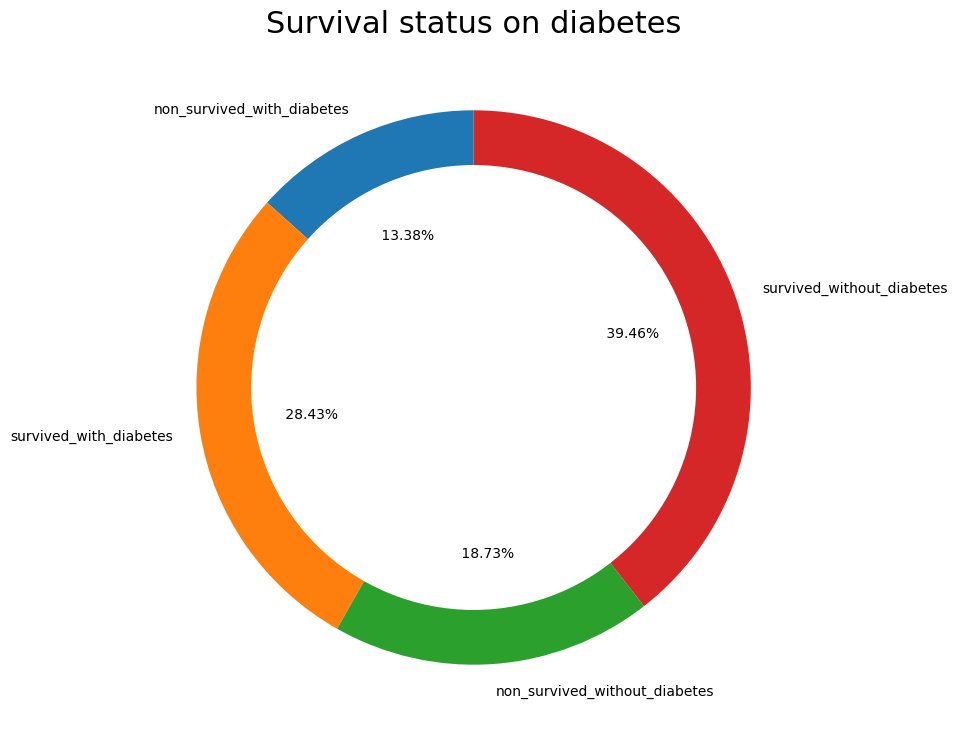

In [88]:
with_diabetes= data[data["diabetes"]== 1]
without_diabetes= data[data["diabetes"]== 0]

non_survived_with_diabetes= with_diabetes[with_diabetes["DEATH_EVENT"]== 1]
survived_with_diabetes= with_diabetes[with_diabetes["DEATH_EVENT"]== 0]
non_survived_without_diabetes= without_diabetes[without_diabetes["DEATH_EVENT"]== 1]
survived_without_diabetes= without_diabetes[without_diabetes["DEATH_EVENT"]== 0]

diabetes_data= [len(non_survived_with_diabetes), len(survived_with_diabetes), len(non_survived_without_diabetes), len(survived_without_diabetes)]
diabetes_labels= ["non_survived_with_diabetes", "survived_with_diabetes", "non_survived_without_diabetes", "survived_without_diabetes"]

plt.figure(figsize= (9,9))
plt.pie(diabetes_data, labels= diabetes_labels, autopct= '% .2f%%', startangle= 90)
circle= plt.Circle((0,0), 0.8 , color= "white")
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on diabetes", fontsize = 22)
plt.show()

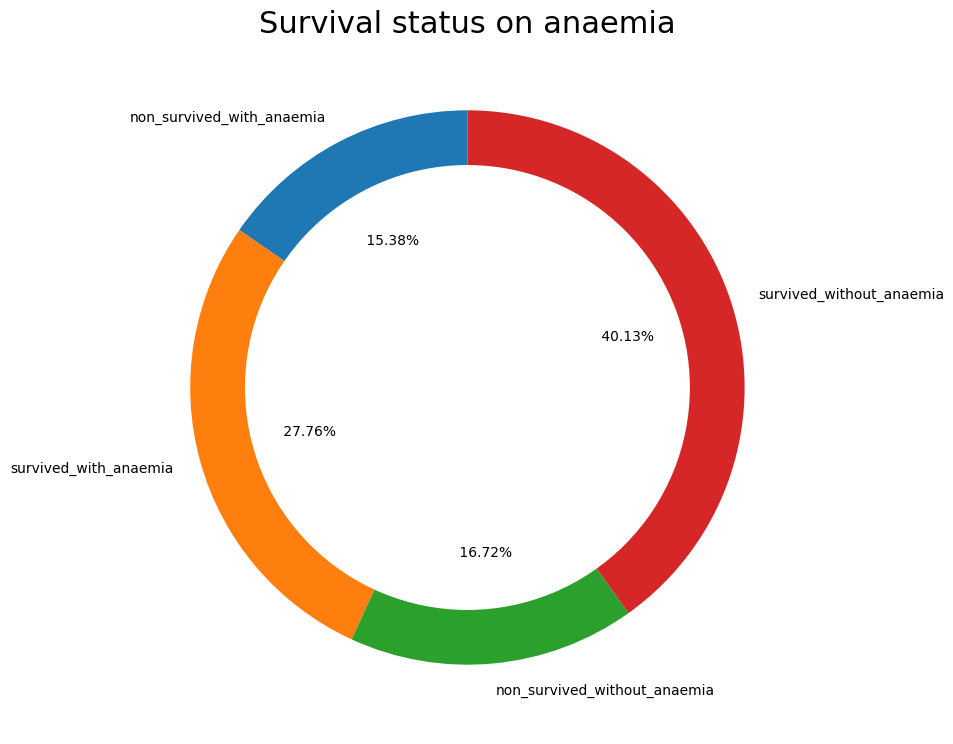

In [89]:
with_anaemia= data[data["anaemia"]== 1]
without_anaemia= data[data["anaemia"]== 0]

non_survived_with_anaemia= with_anaemia[with_anaemia["DEATH_EVENT"]== 1]
survived_with_anaemia= with_anaemia[with_anaemia["DEATH_EVENT"]== 0]
non_survived_without_anaemia= without_anaemia[without_anaemia["DEATH_EVENT"]== 1]
survived_without_anaemia= without_anaemia[without_anaemia["DEATH_EVENT"]== 0]

anaemia_data= [len(non_survived_with_anaemia), len(survived_with_anaemia), len(non_survived_without_anaemia), len(survived_without_anaemia)]
anaemia_labels= ["non_survived_with_anaemia", "survived_with_anaemia", "non_survived_without_anaemia", "survived_without_anaemia"]

plt.figure(figsize= (9,9))
plt.pie(anaemia_data, labels= anaemia_labels, autopct= '% .2f%%', startangle= 90)
circle= plt.Circle((0,0), 0.8, color= "white")
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on anaemia", fontsize = 22)
plt.show()

In [90]:
smoking_counts = data['smoking'].value_counts()
print("Number of non-smokers (0) and smokers (1):")
print(smoking_counts)

Number of non-smokers (0) and smokers (1):
smoking
0    203
1     96
Name: count, dtype: int64


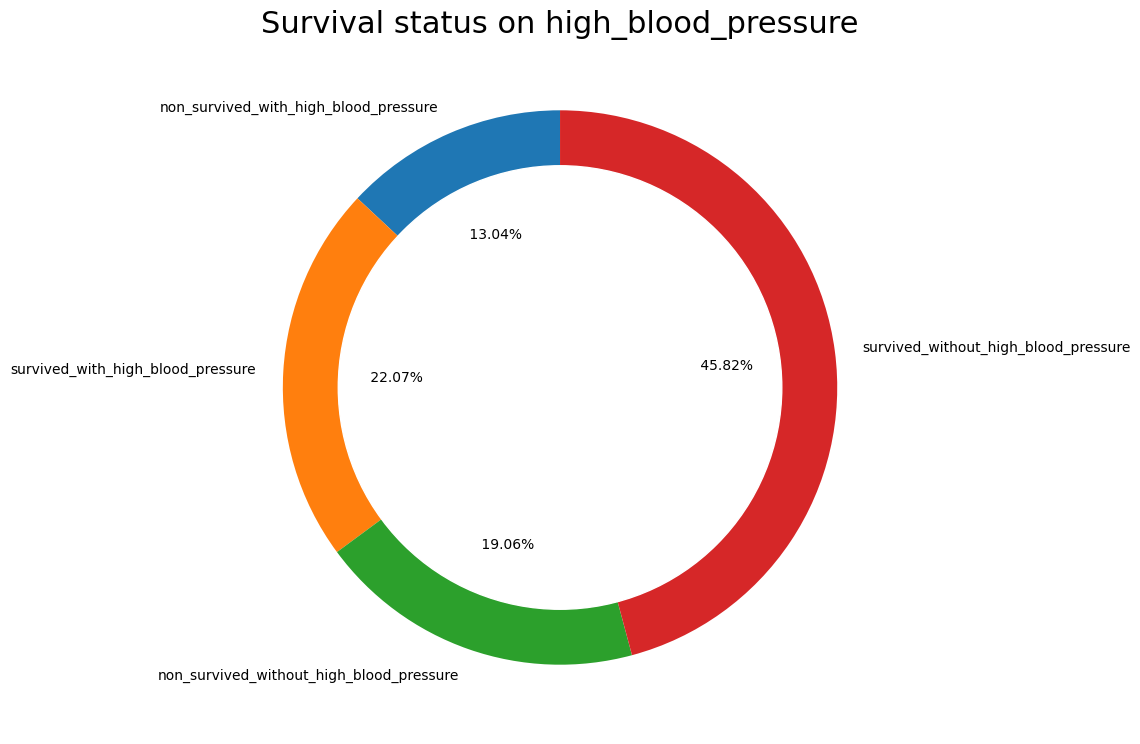

In [91]:
with_high_blood_pressure= data[data["high_blood_pressure"]== 1]
without_high_blood_pressure= data[data["high_blood_pressure"]== 0]

non_survived_with_high_blood_pressure= with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]== 1]
survived_with_high_blood_pressure= with_high_blood_pressure[with_high_blood_pressure["DEATH_EVENT"]== 0]
non_survived_without_high_blood_pressure= without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]== 1]
survived_without_high_blood_pressure= without_high_blood_pressure[without_high_blood_pressure["DEATH_EVENT"]== 0]

high_blood_pressure_data= [len(non_survived_with_high_blood_pressure), len(survived_with_high_blood_pressure), len(non_survived_without_high_blood_pressure), \
                                len(survived_without_high_blood_pressure)]
high_blood_pressure_labels= ["non_survived_with_high_blood_pressure", "survived_with_high_blood_pressure", "non_survived_without_high_blood_pressure", \
                                  "survived_without_high_blood_pressure"]

plt.figure(figsize= (9,9))
plt.pie(high_blood_pressure_data, labels= high_blood_pressure_labels, autopct= '% .2f%%', startangle=90)
circle= plt.Circle((0,0), 0.8, color= "white")
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Survival status on high_blood_pressure", fontsize= 22)
plt.show()

3. Data moddelling and prediction using continuous data:

In [92]:
x= data[["age", "creatinine_phosphokinase", "ejection_fraction", "serum_creatinine", "serum_sodium", "time"]]
y= data["DEATH_EVENT"]

In [93]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 2)


In [94]:
scaler= StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)


In [95]:
accuracy_list= []

3.1 Logistic Regression

In [96]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)
lr_prediction= lr_model.predict(x_test_scaled)
lr_accuracy= (round(accuracy_score(lr_prediction, y_test), 4) * 100)
accuracy_list.append(lr_accuracy)



3.2 Support Vector Machine

In [97]:
svc_model= SVC()
svc_model.fit(x_train_scaled, y_train)
svc_prediction= svc_model.predict(x_test_scaled)
svc_accuracy= (round(accuracy_score(svc_prediction, y_test), 4) * 100)
accuracy_list.append(svc_accuracy)

3.3 KNearestNeighbor

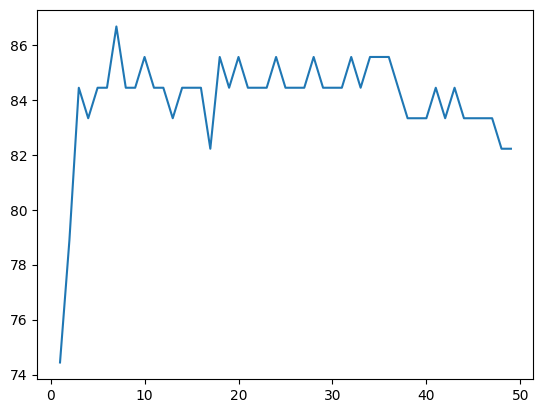

In [98]:
knn_list= []
for k in range(1,50):
  knn_model= KNeighborsClassifier(n_neighbors= k)
  knn_model.fit(x_train_scaled, y_train)
  knn_prediction= knn_model.predict(x_test_scaled)
  knn_accuracy= (round(accuracy_score(knn_prediction, y_test), 4) * 100)
  knn_list.append(knn_accuracy)
k= np.arange(1,50)
plt.plot(k, knn_list)


In [99]:

knn_model= KNeighborsClassifier(n_neighbors= 6)
knn_model.fit(x_train_scaled, y_train)
knn_prediction= knn_model.predict(x_test_scaled)
knn_accuracy= (round(accuracy_score(knn_prediction, y_test), 4) * 100)
accuracy_list.append(knn_accuracy)


3.4 Decision Tree Classifier

In [100]:
dt_model= DecisionTreeClassifier(criterion= "entropy", max_depth= 2)
dt_model.fit(x_train_scaled, y_train)
dt_prediction= dt_model.predict(x_test_scaled)
dt_accuracy= (round(accuracy_score(dt_prediction, y_test), 4) * 100)
accuracy_list.append(dt_accuracy)



**3.5 Naive Bayes**

In [101]:
nb_model= GaussianNB()
nb_model.fit(x_train_scaled, y_train)
nb_prediction= nb_model.predict(x_test_scaled)
nb_accuracy= (round(accuracy_score(nb_prediction, y_test), 4) *100)
accuracy_list.append(nb_accuracy)

**3.6 Random Forest Classifier**

In [103]:
rf_model= RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
rf_prediction= rf_model.predict(x_test_scaled)
rf_accuracy= (round(accuracy_score(rf_prediction, y_test) , 4) * 100)
accuracy_list.append(rf_accuracy)

In [104]:
accuracy_list

[87.78, 84.44, 84.44, 88.89, 82.22, 85.56]

In [105]:
models= ["Logistic Regression", "SVC", "KNearestNeigbors", "Decision Tree", "Naive Bayes", "Random Forest"]

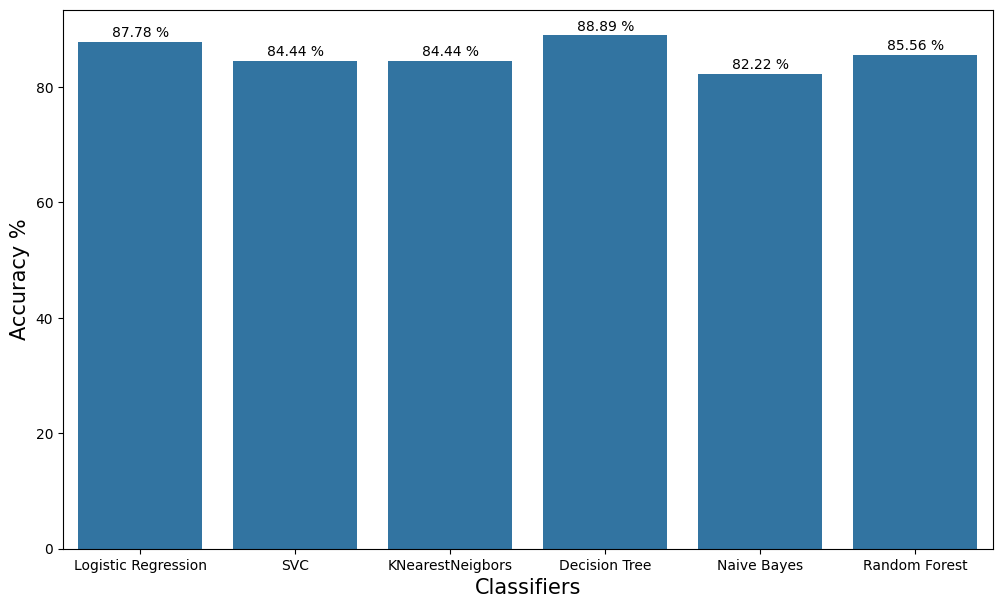

In [107]:
plt.figure(figsize= (12,7))
ax= sns.barplot(x=models, y= accuracy_list)
plt.xlabel("Classifiers", fontsize = 15)
plt.ylabel("Accuracy %", fontsize = 15)
for p in ax.patches:
  width= p.get_width()
  height=p.get_height()
  x= p.get_x()
  y= p.get_y()
  ax.annotate(f"{height} %", (x+width/2, y + height*1.01), ha= "center")
plt.show()

In [134]:
!pip install -q streamlit

In [135]:
%%writefile app.py

import streamlit as st

st.write("Hello, World")

Overwriting app.py


In [136]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
added 22 packages in 3s
⠹
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹

In [137]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel  --port 8501

⠙⠹your url is: https://three-dryers-boil.loca.lt
